# RNN model for stock price forecasting

In [1]:
########Load required Modules
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import time
######import functions 
import torch.nn.functional as F
from torch.autograd import Variable
###### Set device: GPU or CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
device

device(type='cpu')

# Preprocess dataset
use close to forecast

In [68]:
# Train
dataset_train = pd.read_csv("train.csv")
dataset_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-03,1418.030029,1429.420044,1407.859985,1416.599976,1416.599976,3429160000
1,2007-01-04,1416.599976,1421.839966,1408.430054,1418.339966,1418.339966,3004460000
2,2007-01-05,1418.339966,1418.339966,1405.750000,1409.709961,1409.709961,2919400000
3,2007-01-08,1409.260010,1414.979980,1403.969971,1412.839966,1412.839966,2763340000
4,2007-01-09,1412.839966,1415.609985,1405.420044,1412.109985,1412.109985,3038380000
...,...,...,...,...,...,...,...
2411,2016-08-01,2173.149902,2178.290039,2166.209961,2170.840088,2170.840088,3505990000
2412,2016-08-02,2169.939941,2170.199951,2147.580078,2157.030029,2157.030029,3848750000
2413,2016-08-03,2156.810059,2163.790039,2152.560059,2163.790039,2163.790039,3786530000
2414,2016-08-04,2163.510010,2168.189941,2159.070068,2164.250000,2164.250000,3709200000


In [ ]:
dataset_train['Date'] = pd.to_datetime(dataset_train['Date'])
dataset_train = dataset_train[['Close']]

In [5]:
dataset_train

,Close
0,1416.599976
1,1418.339966
2,1409.709961
3,1412.839966
4,1412.109985
...,...
2411,2170.840088
2412,2157.030029
2413,2163.790039
2414,2164.250000


In [69]:
# Val
dataset_val = pd.read_csv("val.csv")
dataset_val

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-08-08,2183.760010,2185.439941,2177.850098,2180.889893,2180.889893,3327550000
1,2016-08-09,2182.239990,2187.659912,2178.610107,2181.739990,2181.739990,3334300000
2,2016-08-10,2182.810059,2183.409912,2172.000000,2175.489990,2175.489990,3254950000
3,2016-08-11,2177.969971,2188.449951,2177.969971,2185.790039,2185.790039,3423160000
4,2016-08-12,2183.739990,2186.280029,2179.419922,2184.050049,2184.050049,3000660000
...,...,...,...,...,...,...,...
801,2019-10-14,2965.810059,2972.840088,2962.939941,2966.149902,2966.149902,2559270000
802,2019-10-15,2973.610107,3003.280029,2973.610107,2995.679932,2995.679932,3345090000
803,2019-10-16,2989.679932,2997.540039,2985.199951,2989.689941,2989.689941,3230320000
804,2019-10-17,3000.770020,3008.290039,2991.790039,2997.949951,2997.949951,3103470000


In [ ]:
dataset_val['Date'] = pd.to_datetime(dataset_val['Date'])
dataset_val = dataset_val[['Close']]

In [70]:
dataset_val

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-08-08,2183.760010,2185.439941,2177.850098,2180.889893,2180.889893,3327550000
1,2016-08-09,2182.239990,2187.659912,2178.610107,2181.739990,2181.739990,3334300000
2,2016-08-10,2182.810059,2183.409912,2172.000000,2175.489990,2175.489990,3254950000
3,2016-08-11,2177.969971,2188.449951,2177.969971,2185.790039,2185.790039,3423160000
4,2016-08-12,2183.739990,2186.280029,2179.419922,2184.050049,2184.050049,3000660000
...,...,...,...,...,...,...,...
801,2019-10-14,2965.810059,2972.840088,2962.939941,2966.149902,2966.149902,2559270000
802,2019-10-15,2973.610107,3003.280029,2973.610107,2995.679932,2995.679932,3345090000
803,2019-10-16,2989.679932,2997.540039,2985.199951,2989.689941,2989.689941,3230320000
804,2019-10-17,3000.770020,3008.290039,2991.790039,2997.949951,2997.949951,3103470000


In [6]:
dataset_train.shape, dataset_val.shape

((2416, 1), (806, 1))

# use Minimax strategic to rescale data

In [7]:
scaler_train = MinMaxScaler()
scaler_val = MinMaxScaler()
dataset_train_scaled = scaler_train.fit_transform(dataset_train.Close.values.reshape(-1,1))
dataset_val_scaled = scaler_val.fit_transform(dataset_val.Close.values.reshape(-1,1))

# use a window of 20 days on close price

In [8]:
window = 21

In [9]:
x_train = []
y_train = []
for index in range(len(dataset_train_scaled) - window):
    need_data = dataset_train_scaled[index: index + window]
    x_train.append(need_data[:-1])
    y_train.append(need_data[-1])
x_train = np.array(x_train)
y_train = np.array(y_train)

In [10]:
x_val = []
y_val = []
for index in range(len(dataset_val_scaled) - window):
    need_data = dataset_val_scaled[index: index + window]
    x_val.append(need_data[:-1])
    y_val.append(need_data[-1])
x_val = np.array(x_val)
y_val = np.array(y_val)

In [11]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((2395, 20, 1), (2395, 1), (785, 20, 1), (785, 1))

In [12]:
x_train_torch = torch.from_numpy(x_train).type(torch.Tensor)
y_train_torch = torch.from_numpy(y_train).type(torch.Tensor)

x_val_torch = torch.from_numpy(x_val).type(torch.Tensor)
y_val_torch = torch.from_numpy(y_val).type(torch.Tensor)

In [13]:
##### DEFINE RNN net as described above: 
class StackedRNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=1):
        super(StackedRNN, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        # Create a list to hold multiple RNN layers
        self.rnn_layers = nn.ModuleList([nn.RNN(input_dim if i == 0 else hidden_dim,
                                                hidden_dim,
                                                batch_first=True)
                                         for i in range(num_layers)])
        
        # Final fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initialize hidden states
        hiddens = [torch.zeros(1, x.size(0), self.hidden_dim).to(x.device) for _ in range(self.num_layers)]
        
        # Forward pass through each RNN layer
        for i, rnn_layer in enumerate(self.rnn_layers):
            out, hiddens[i] = rnn_layer(x if i == 0 else out, hiddens[i])
        
        out = self.fc(out[:, -1, :])
        return out

In [14]:
# Set hyperparameter
num_epochs = 200# number of iterations
input_dim = 1 # dimension of input data
hidden_dim = 64 # dimension of hidden layers
num_layers = 3 # number of RNN
output_dim = 1# dimension of output data

# Set the Loss & Optimizer

In [15]:
####### Declare a net
stacked_rnn_model = StackedRNN(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers).to(device)

#######define LOSS and Optimizer
criterion = torch.nn.MSELoss(reduction='mean')
# optimizer = optim.SGD(model.parameters(), lr = 0.01)
optimiser = torch.optim.Adam(stacked_rnn_model.parameters(), lr=0.005)
####### show the net frame
stacked_rnn_model

StackedRNN(
  (rnn_layers): ModuleList(
    (0): RNN(1, 64, batch_first=True)
    (1-2): 2 x RNN(64, 64, batch_first=True)
  )
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

# train the model

In [16]:
# Ensure the stacked_rnn_model is in training mode
stacked_rnn_model.train()
hist = []  # Using a list instead of np.zeros for dynamic storage of losses
start_time = time.time()

for t in range(num_epochs):
    y_train_pred = stacked_rnn_model(x_train_torch.to(device))
    loss = criterion(y_train_pred, y_train_torch.to(device))
    if t % 10 == 0:
        print("Epoch ", t, "MSE: ", loss.item())
    hist.append(loss.item())
    # Zero the parameter gradients
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

torch.save(stacked_rnn_model.state_dict(), 'stacked_rnn_model.pth')  # Save the model state_dict
training_time = time.time() - start_time
print("Training time: {}".format(training_time))
print('Finished Training')


Epoch  0 MSE:  0.37289464473724365
Epoch  10 MSE:  0.03460518270730972
Epoch  20 MSE:  0.0031166928820312023
Epoch  30 MSE:  0.0019151000306010246
Epoch  40 MSE:  0.00044376321602612734
Epoch  50 MSE:  0.00023275859712157398
Epoch  60 MSE:  0.0002367276028962806
Epoch  70 MSE:  0.00022926913516130298
Epoch  80 MSE:  0.00021539762383326888
Epoch  90 MSE:  0.00019409983360674232
Epoch  100 MSE:  0.00018832770001608878
Epoch  110 MSE:  0.00018193935102317482
Epoch  120 MSE:  0.00017798130284063518
Epoch  130 MSE:  0.000174629021785222
Epoch  140 MSE:  0.00017158807895611972
Epoch  150 MSE:  0.00016883730131667107
Epoch  160 MSE:  0.00016635440988466144
Epoch  170 MSE:  0.0001640865666558966
Epoch  180 MSE:  0.0001620091643417254
Epoch  190 MSE:  0.00016010190302040428
Training time: 21.343385696411133
Finished Training


# Evalue the model

In [17]:
########Load pretrain model
# Create an instance of the StackedRNN model
final_model = StackedRNN(input_dim, hidden_dim, output_dim, num_layers)

# Load the model's state dictionary
final_model.load_state_dict(torch.load('stacked_rnn_model.pth'))

# Move the model to the specified device
final_model = final_model.to(device)


In [18]:
########Evaluate model
final_model.eval()
y_train_model = scaler_train.inverse_transform(y_train_pred.detach().cpu().numpy())
y_train_original = scaler_train.inverse_transform(y_train)


y_val_pred = final_model(x_val_torch.to(device))
y_val_model = scaler_val.inverse_transform(y_val_pred.detach().cpu().numpy())
y_val_original = scaler_val.inverse_transform(y_val)

In [19]:
y_val_model.shape, y_val_original.shape

((785, 1), (785, 1))

# Visualization

<Figure size 2560x1920 with 0 Axes>

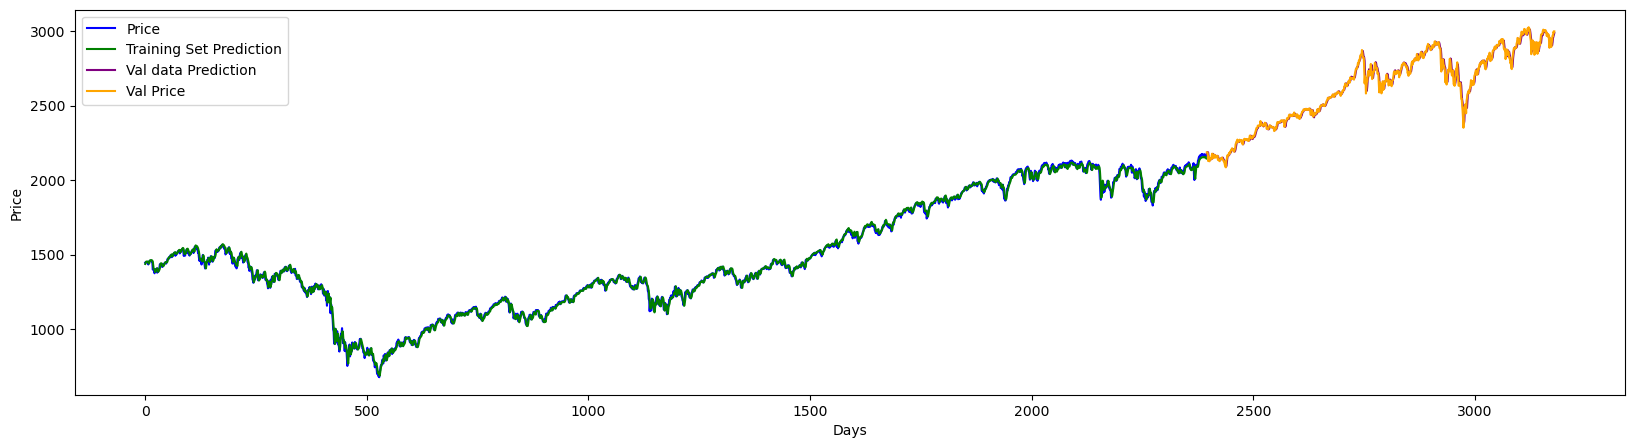

In [20]:
######visualization for single test
N_original,N_val = len(y_train_original),len(y_val_model)
index_val = [i for i in range(0,N_val)]
index_val = np.array(index_val).reshape(-1,1) + N_original

## Show all curve
plt.figure(dpi=400)
plt.figure(figsize=(20, 5))
#plt.plot(y_train_original, color = 'blue', label = 'Price')
#plt.plot(y_train_model, color = 'green', label = 'Training Set Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(index_val, y_val_model, color = 'purple', label = 'Val data Prediction')
plt.plot(index_val, y_val_original, color = 'orange', label = 'Val Price')
plt.legend()
plt.savefig("RNN-Val-Result1.png", dpi=500)
plt.show()
df_Stacked_RNN_result = pd.DataFrame({'Original':y_val_original.flatten(),'Val Prediction':y_val_model.flatten()})
df_Stacked_RNN_result.to_csv(r"RNN-Val-Result.csv",sep=',')

<Figure size 2560x1920 with 0 Axes>

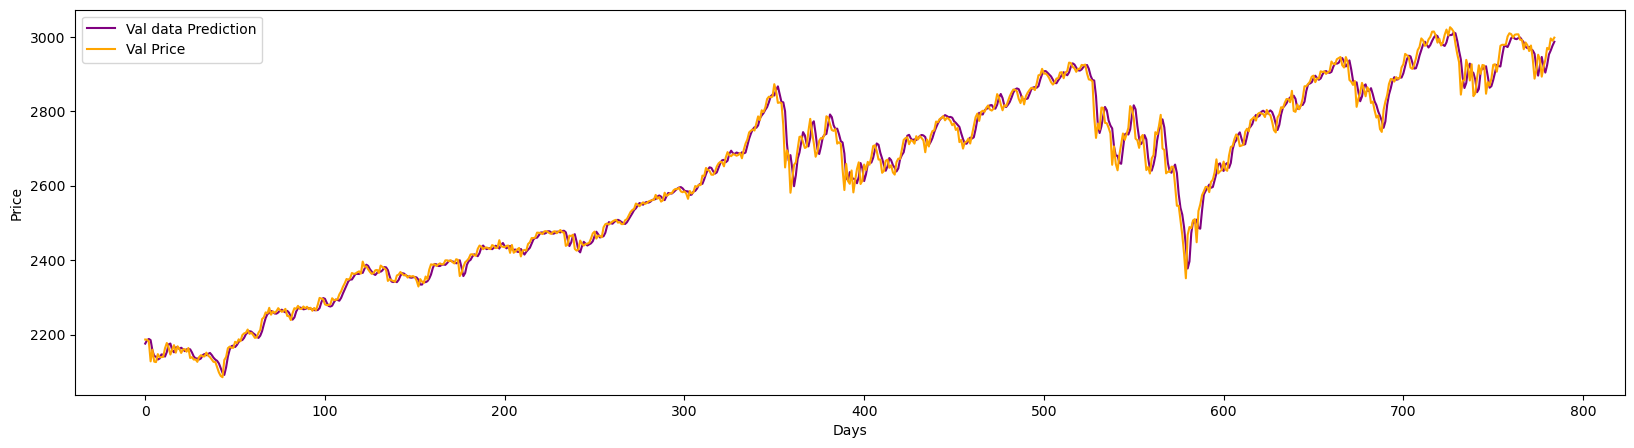

In [24]:
N_val = len(y_val_model)
index_val = [i for i in range(0,N_val)]
index_val = np.array(index_val).reshape(-1,1)  #+ N_original

## Show all curve
plt.figure(dpi=400)
plt.figure(figsize=(20, 5))
#plt.plot(y_train_original, color = 'blue', label = 'Price')
#plt.plot(y_train_model, color = 'green', label = 'Training Set Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(index_val, y_val_model, color = 'purple', label = 'Val data Prediction')
plt.plot(index_val, y_val_original, color = 'orange', label = 'Val Price')
plt.legend()
plt.savefig("RNN-Val-Result1.png", dpi=500)
plt.show()
df_Stacked_RNN_result = pd.DataFrame({'Original':y_val_original.flatten(),'Val Prediction':y_val_model.flatten()})
df_Stacked_RNN_result.to_csv(r"RNN-Val-Result.csv",sep=',')

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate the mean squared_error
mse = mean_squared_error(y_val_original, y_val_model)

# calculate the r2 score
r2 = r2_score(y_val_original, y_val_model)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate Determination Coefficient (DS)
def calculate_ds(y_true, y_pred):
    d = []
    for i in range(1,len(y_true)):
        if (y_true[i]-y_pred[i-1])*(y_pred[i] - y_true[i-1])>=0:
            d.append(1)
        else:
            d.append(0)
    DS = (1/(len(y_true)-1))*np.sum(d)*100  
    return DS

# Calculate MAPE
mape = calculate_mape(y_val_original, y_val_model)

# Calculate DS
DS = calculate_ds(y_val_original, y_val_model)

print("Mean Absolute Percentage Error (MAPE):", mape)
print("Determination Coefficient (DS):", DS)

Mean Squared Error (MSE): 593.8379840638987
R-squared (R²): 0.9902000226279294
Mean Absolute Percentage Error (MAPE): 0.6257601560484036
Determination Coefficient (DS): 29.209183673469386


# Backtest

In [65]:
def backtest(predictions, original_prices, threshold=0.007, initial_cash=500000):
    """
    Backtest function to simulate trading based on the model's predictions.

    :param predictions: The predicted prices from the model.
    :param original_prices: The actual prices of the stock.
    :param threshold: The threshold for making a trade decision.
    :param initial_cash: The initial cash in the portfolio.
    :return: The final portfolio value and the total return.
    """
    cash = initial_cash
    shares = 0
    total_assets = initial_cash

    for i in range(1, len(predictions)):
        predicted_change = (predictions[i] - original_prices[i - 1]) / original_prices[i - 1]
        actual_change = (original_prices[i] - original_prices[i - 1]) / original_prices[i - 1]

        # Decision to buy
        if predicted_change > threshold and cash >= original_prices[i]:
            shares_bought = cash // original_prices[i]
            shares += shares_bought
            cash -= shares_bought * original_prices[i]

        # Decision to sell
        elif predicted_change < -threshold and shares > 0:
            cash += shares * original_prices[i]
            shares = 0

        # Update total assets value
        total_assets = cash + shares * original_prices[i]

    total_return = total_assets - initial_cash
    return total_assets, total_return

In [66]:
initial_cash = 500000
threshold = 0.007
# Applying the backtest function to the RNN model's predictions
final_assets, total_return = backtest(y_val_model[:, 0], y_val_original[:, 0], threshold=threshold, initial_cash=initial_cash)
return_rate = (total_return/initial_cash)*100
print("Final Assets:", final_assets, "Total Return:", total_return, "Return Rate:",return_rate)

Final Assets: 651143.8881835938 Total Return: 151143.88818359375 Return Rate: 30.22877763671875
